In [1]:
###Load Box for libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from pickle import dump
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

The Madelon dataset Download Madelon datasetis a synthetic dataset that was generated for a machine learning competition. It is a high-dimensional dataset, with 500 features and 2,600 data points. It has a highly non-linear structure, and in this homework assignment, you’ll be diving into it further with PCA and k-means clustering. When you are asked to generate a plot, please provide the image in your final writeup along with a brief analysis of its major features.

Before performing any dimensionality reduction, write a program to use k-means clustering on the Madelon dataset. Try the following k values: 4, 8, 16, 32, 64. 

What preprocessing techniques did you apply, if any?

Describe qualitatively: how does the number of clusters affect the performance of the clustering algorithm on the dataset? 

Generate a plot of the number of clusters k (x-axis) versus the sum of squared distance (SSE) between data points and their assigned centroids (y-axis). What appears to be the optimal k from the list of values you used, and why? 

For k = 8, how did you initialize the set of cluster centroids before running k-means? Rerun k-means again, this time ensuring that the centroids are all different. Does this – and if so, to what extent – affect the final clusters created?

More generally for any dataset, what evaluation metrics can be used to assess the quality of the clusters produced?

# PreProcessing:

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) may assume that all features are centered around zero or have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

The preprocessing module provides the StandardScaler utility class, which is a quick and easy way to perform the following operation on an array-like dataset

Another method of standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler

(Source : SciKitLearn User Guide https://scikit-learn.org/stable/modules/clustering.html#k-means ; https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)

We use these toggles in my approach to choose the standardization that we want

# Evaluation Metric to Assess Clusters
Any time clustering is performed on a data set we will find clusters. But we really want to know whether the clusters that have been found represent true subgroups in the data, or whether they are simply a result of clustering the noise. For instance, if we were to obtain an independent set of observa- tions, then would those observations also display the same set of clusters? This is a hard question to answer. There exist a number of techniques for assigning a p-value to a cluster in order to assess whether there is more evidence for the cluster than one would expect due to chance. However, there has been no consensus on a single best approach. More details can be found in Hastie et al. (2009).

(Source : ISLR, ESLII)


In [2]:

#data_normalization ='scalar'
data_normalization ='minmax'
#data_normalization ='none'

In [3]:
data = pd.read_csv("madelon.csv")
data.describe()
data = pd.DataFrame(data)

In [4]:
def normalization(dataset):  
    if data_normalization=='scalar':
        
        scaler = StandardScaler()
        dataset = scaler.fit_transform(dataset)
        # save the scaler
        dump(scaler, open('scaler.pkl', 'wb'))
        return dataset
    
    elif data_normalization=='minmax':
        
        scaler = MinMaxScaler()
        dataset = scaler.fit_transform(dataset)
        # save the scaler
        dump(scaler, open('scaler.pkl', 'wb'))
        return dataset
    
    else:
        pass

In [5]:
if __name__ == '__main__':
    data = normalization(data)
    data = pd.DataFrame(data)
    nCol = len(data.axes[1])
    km = KMeans()
    

In [6]:
sse = []
k_rng = [4,8,16,32,64]
k=8
for k in k_rng:
    #print(k)
    km = KMeans(n_clusters=k)
    km.fit(data)
    #print(km.cluster_centers_)
    #print(plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid'))
    sse.append(km.inertia_)

The Elbow plot below shows that the inflection can be seen at k=16, therefore we use k=16 clusters as the optimum cluster count

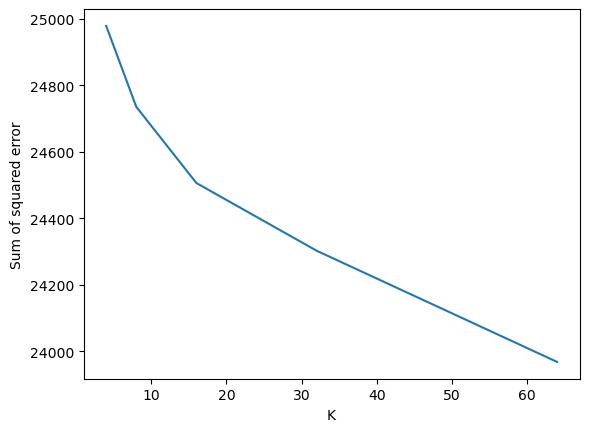

In [7]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [8]:
k=8
km = KMeans(n_clusters=k, init='random')
km.fit(data)
#print(km.cluster_centers_)
#print(plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid'))
km.inertia_

24732.35958200844

The 8 cluster variant with randomized initial centroids has an SSE almost similar to what we observed in our earlier trials. There is no significant difference

# Question 2
The Madelon dataset is high-dimensional, with 500 features per data point. Some of these features might be redundant or noisy, making clustering more difficult. 

Fit the standardized data with PCA. Then, create a cumulative variance plot – showing the number of components included (x-axis) versus the amount of variance captured (y-axis). Generally, we want to retain at least 75% of the variance. How many components would you decide to keep?

Perform PCA with your selected principal components.

Plot the transformed data on a graph with the first two principal components as the axes i.e. x = PC 1, y = PC 2.

Plot the original data on a graph with the two original variables that have the highest absolute combined loading for PC 1 and PC 2 i.e. maximizing |loading PC1| + |loading PC2|.

Examine the scatter plot of PC 1 (x-axis) versus PC 2 (y-axis) for all data points that you created in the previous part. Qualitatively, can you identify visible clusters? Why or why not might this be the case with this particular dataset?

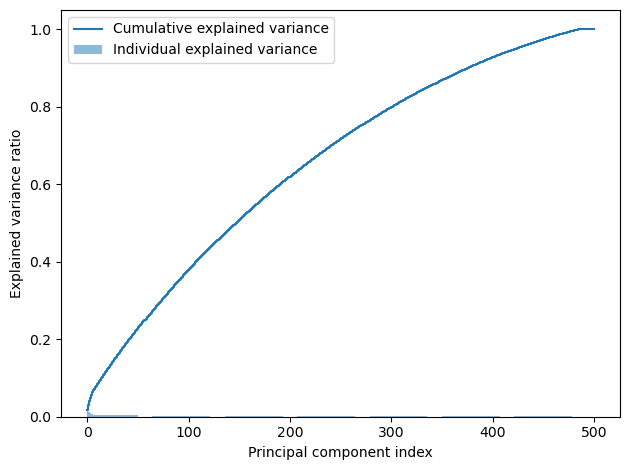

Number of components that explain 75% of the variation: 271


In [10]:
##PCA 
pca=PCA()
pca.fit(data)
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

n_comp = np.argmax(cum_sum_eigenvalues >= 0.75) + 1
print("Number of components that explain 75% of the variation:", n_comp)

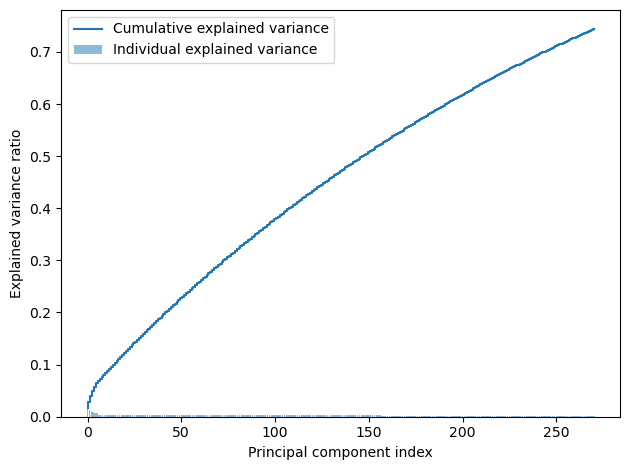

In [11]:
data_pca = pca.transform(data)
pca2 = PCA(n_components = n_comp)
pca_2 = pca2.fit(data_pca)

exp_var_pca2 = pca2.explained_variance_ratio_
cum_sum_eigenvalues2 = np.cumsum(exp_var_pca2)


plt.bar(range(0,len(exp_var_pca2)), exp_var_pca2, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues2)), cum_sum_eigenvalues2, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

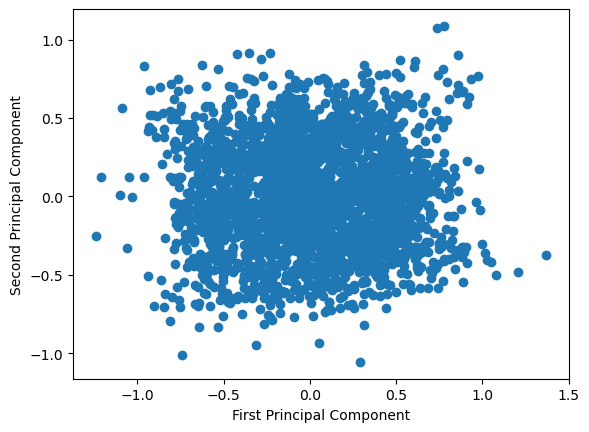

In [12]:
data_pca2 = pca2.transform(data_pca)
plt.scatter(data_pca2[:, 0], data_pca2[:, 1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()


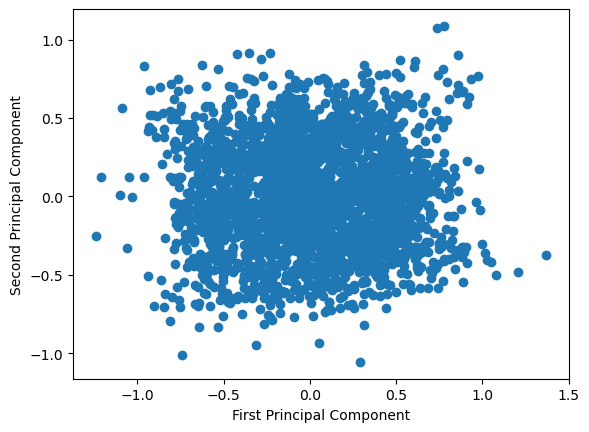

In [13]:
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()


High dimensioned data, here very clearly 2 principal components do not cut the ability to draw the inferences. >75% of the variance is not captures in PC1 and PC2, therefore, it becomes impossible to visibly identify clusters in the above data.

# Question 3

Now, we will run k-means clustering on the transformed data from the previous problem.

Why is it a good idea to do this, especially for high-dimensional datasets? Name a number of reasons.

Use the same k values again (4, 8, 16, 32, 64) to again generate an elbow plot. 

What is the optimal k? Is it different from the one you found in (1)?

Compare the SSE values plotted in this exercise to the previous plot you generated in (1c) before performing PCA.

Again, create a scatter plot of PC 1 (x-axis) versus PC 2 (y-axis) for all of the transformed data points. Label the cluster centers and color-code by cluster assignment for the first 5 iterations of k = 32. Can you see the algorithm begin to converge to optimal assignments?

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion.
 
Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

Source : https://scikit-learn.org/stable/modules/clustering.html#k-means

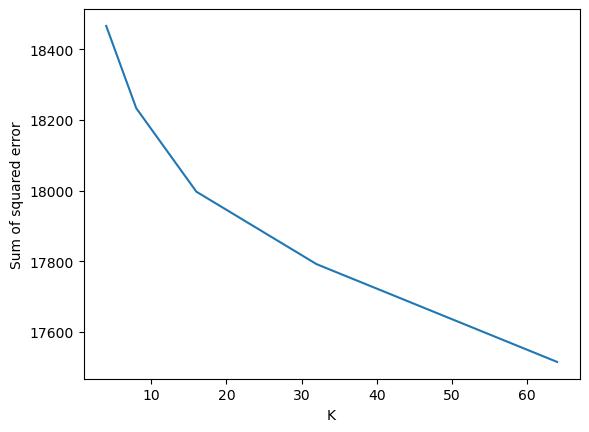

In [14]:
sse = []
k_rng = [4,8,16,32,64]
for k in k_rng:
    #print(k)
    km = KMeans(n_clusters=k)
    km.fit(data_pca2)
    #print(km.cluster_centers_)
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Note that the SSE values have reduced considerably compared to our previous trials

In [15]:
for k in [4]:
    print(k)
    km = KMeans(n_clusters=k)
    km.fit(data_pca2)
    print(km.cluster_centers_)
    print(km.inertia_)

4
[[ 3.34850586e-01 -2.08868031e-01  2.35162232e-01 ...  4.48388548e-03
  -5.83831716e-04  8.56686364e-04]
 [ 2.57285850e-01  3.04803830e-01 -1.93796287e-01 ... -6.31063423e-03
  -2.43551368e-03 -1.54059373e-03]
 [-1.72242068e-01 -3.00917160e-01 -2.33826592e-01 ...  1.25979312e-03
   4.26205122e-03  1.36685859e-03]
 [-4.05499221e-01  1.69326680e-01  1.38204834e-01 ...  3.47802195e-04
  -7.22712471e-04 -5.43828558e-04]]
18467.694472708714


In [16]:
y_predicted = km.fit_predict(data_pca2)
y_predicted
data_pca2 = pd.DataFrame(data_pca2)
data_pca2['cluster']=y_predicted


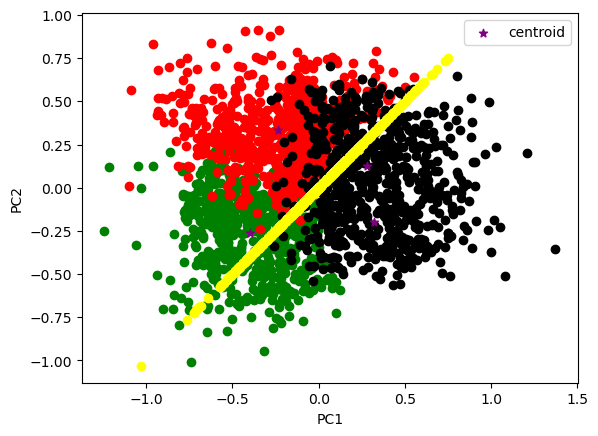

In [17]:
dfs = {}

# Loop through the unique values in the "cluster" column
for i in data_pca2['cluster'].unique():
    # Filter the original dataframe for the current value of i
    dfs[f'df{i}'] = data_pca2[data_pca2['cluster'] == i]


df1 = dfs['df0']
df2 = dfs['df1']
df3 = dfs['df2']
df4 = dfs['df2']



plt.scatter(df1.iloc[:,0],df1.iloc[:,1],color='green')
plt.scatter(df2.iloc[:,0],df2.iloc[:,1],color='red')
plt.scatter(df3.iloc[:,0],df3.iloc[:,3],color='black')
plt.scatter(df4.iloc[:,4],df4.iloc[:,4],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
    

The above plot visualized PC1 and PC2 scatter with the predicted clusters for a 4 cluster K-Means approach, as you can see, the yellow cluster is very peculiar.

A little more insight into the Madelon dataset itself, MADELON is an artificial dataset containing data points grouped in 32 clusters placed on the vertices of a five dimensional hypercube and randomly labeled +1 or -1. The five dimensions constitute 5 informative features. 15 linear combinations of those features were added to form a set of 20 (redundant) informative features. Based on those 20 features one must separate the examples into the 2 classes (corresponding to the +-1 labels). We added a number of distractor feature called 'probes' having no predictive power. The order of the features and patterns were randomized. (Source: https://archive.ics.uci.edu/ml/datasets/madelon)

It could be possible that the current method was able to identify one such predictor and failed to classify the rest. It's a long shot nonetheless.

Here's another approach from caprinomics.com (http://www.caprinomics.com/projects/madelon-madness/)